# **Práctica 2: Álgebra Lineal Numérica** 
## Parte computacional
Alumnos:

*   Olvera Trejo Alberto
*   Ramos López Gabriela


# **Ejercicio 1**

La matriz de Hilbert, $H^{(n)}$, de orden $n$ se define como

$$H^{(n)}_{ij}=\frac{1}{i+j-1},\quad\text{para}\;\; i,j=1,2,3,\dots,n.$$

Escribe un programa que genere la matriz de Hilbert $H^{(n)}$, de $n\times n$, y que construya una tabla que muestre el número de condición $Cond(H^{(n)})$ para $n = 1,2,...,30$.

In [ ]:
import pandas as pd
import numpy as np

# Definimos una función que generará nuestra matriz de Hilbert
def hilmat(a, b):
   return [
      [1 / (i + j + 1) for j in range(b)]
      for i in range(a)
   ]

#Creamos listas vacías para nuestros valores 
m_hilbert = []
n_cond = []
num = []

#Generamos la matriz de Hilbert de nxn y calculamos su número de condición respectivo
for n in range(1,31):
  matrh = hilmat(n, n)
  numcond = np.linalg.cond(np.array(matrh))

  m_hilbert.append(matrh)
  n_cond.append(numcond)
  num.append(n)

#Creamos nuestro data frame  
tabla = pd.DataFrame({'n': num, 'Número de condición': n_cond})


In [ ]:
tabla

,n,Número de condición
0,1,1.000000e+00
1,2,1.928147e+01
2,3,5.240568e+02
3,4,1.551374e+04
4,5,4.766073e+05
5,6,1.495106e+07
6,7,4.753674e+08
7,8,1.525758e+10
8,9,4.931538e+11
9,10,1.602442e+13


> - <font color=blue>Grafica $Cond(H^{(n)})$ contra $n$ utilizando escala logarítmica para el eje vertical.</font>

Text(0.5, 1.0, ' $Cond(H^{(n)})$ vs $n$')

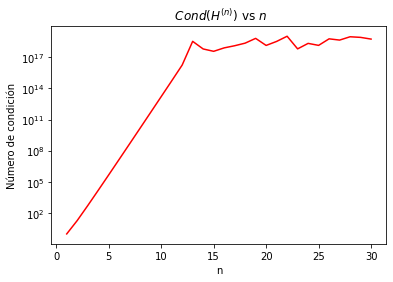

In [ ]:
import matplotlib.pyplot as plt

plt.plot(num,n_cond,'r')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('Número de condición')
plt.title(" $Cond(H^{(n)})$ vs $n$")

> - <font color=blue>Basándose en el comportamiento de $Cond(H^{(n)})$, ¿cómo es el condicionamiento de $H^{(n)}$ conforme $n$ aumenta?</font>

Veamos que entre más grande es n, el número de condición aumenta, es decir tenemos que $H^{(n)}$ es sensible a cambios en el valor de entrada (n). 

# **Ejercicio 2**
Escribe un programa que, mediante el método de eliminación de Gauss sin pivoteo, resuelva un sistema de ecuaciones de $n \times n$. Toma en cuenta las restricciones y condiciones que se deben cumplir para poder utilizar este método.

In [ ]:
import numpy as np

#Haremos un programa que resuelva el sistema sin pivoteo y que de paso calcule 
#las matrices L y U
def solver(A, b):
  """
  Programa que, dada una matriz y un vector de valores independientes, resuelve
  el sistema de ecuaciones dado siempre y cuando la matriz sea no singular
  
  Entrada:
    A: Matriz asociada al sistema de ecuaciones
    b: Vectores de valores independinetes

  Salida:
    X: Vector solución
    L: Matriz L de la factorización LU
    U: Matriz U de la factorización LU
  """
  n = len(A)
  #lista que va a contener las matrices de eliminacion
  matrices_eliminacion_inversa = []

  if np.linalg.det(A) == 0:
      print("La matriz ingresada no es invertible, por lo tanto no existe solución al sistema Ax = b")

  else:
      #iteramos sobre cada columna para contruir la matriz triangular superior
      for columna in range(n):
          #inicializamos la matriz de eliminacion y la inversa
          matriz_eliminacion = np.eye(n)
          matriz_eliminacion_inversa = np.eye(n)
            
          #Identificamos el elemento pivote
          pivote = A[columna][columna]

          #Iteramos sobre cada fila para construir la matriz de eliminacion
          for i in range(columna + 1, n):
              matriz_eliminacion[i][columna] = -A[i][columna]/pivote
              matriz_eliminacion_inversa[i][columna] = A[i][columna]/pivote
            
            #Hacemos la multiplicacion de matrices
          A = matriz_eliminacion @ A
          b = matriz_eliminacion @ b

          matrices_eliminacion_inversa.append(matriz_eliminacion_inversa)

  #Empezamos la sustitucion hacia atras y guardamos la matriz U 
  X = np.zeros(n)
  U = A.copy()

  X[-1] = b[-1]/A[-1][-1]

  #Recorremos las ecuaciones de abajo hacia arriba
  for ecuacion in range(n -1, 0, -1):
      #Vamos sutituyendo
      for sumando in range(1, n - ecuacion + 1):
          b[ecuacion - 1] -= A[ecuacion - 1][-sumando] * X[-sumando]
        
      #Calculamos la variable
      X[ecuacion - 1] = (b[ecuacion - 1])/A[ecuacion - 1][ecuacion - 1]
    
  #Imprimimos el vector resultado
  for i in range(len(X)):
      print(f"La variable {i + 1} es igual a {X[i]}")

  #Invertimos la lista de las matrices de eliminacion invertidas
  matrices_eliminacion_inversa.reverse()

  #Calculamos la matriz L
  L = np.eye(n)
    
  for matriz in matrices_eliminacion_inversa:
      L = matriz @ L
        
  #Regresamos el vector de resulado y las matrices L y U
  return(X, L, U)

In [ ]:
#Pruebas
X = np.array([[1, -1, 0, 5], [3, -2, 1, -1], [1, 1, 9, 4], [1, -7, 2, 3]])
y = np.array([[18], [8], [47], [32]])

res, L, U = solver(X, y)
print(res)
print(L)
print(U)

La variable 1 es igual a 1.0
La variable 2 es igual a -2.0
La variable 3 es igual a 4.0
La variable 4 es igual a 3.0
[ 1. -2.  4.  3.]
[[ 1.          0.          0.          0.        ]
 [ 3.          1.          0.          0.        ]
 [ 1.          2.          1.          0.        ]
 [ 1.         -6.          1.14285714  1.        ]]
[[   1.           -1.            0.            5.        ]
 [   0.            1.            1.          -16.        ]
 [   0.            0.            7.           31.        ]
 [   0.            0.            0.         -133.42857143]]


# **Ejercicio 4**
Construye dos rutinas que resuelvan sistemas de ecuaciones lineales mediante los métodos de factorización LU y factorización de Cholesky. Toma en consideración las restricciones y consideraciones que se deben cumplir para cada método.

In [ ]:
#Usando el programa del ejercicio pasado, obtenemos la solucion por el metodo LU

def LU_Chol(A, x):
  res, L, U = solver(A, x)
  print(f"El vector solución es: {res}")
  print("La matriz L es:")
  print(L)
  print("La matriz U es:")
  print(U)

In [ ]:
LU_Chol(X, y)

La variable 1 es igual a 1.0
La variable 2 es igual a -2.0
La variable 3 es igual a 4.0
La variable 4 es igual a 3.0
El vector solución es: [ 1. -2.  4.  3.]
La matriz L es:
[[ 1.          0.          0.          0.        ]
 [ 3.          1.          0.          0.        ]
 [ 1.          2.          1.          0.        ]
 [ 1.         -6.          1.14285714  1.        ]]
La matriz U es:
[[   1.           -1.            0.            5.        ]
 [   0.            1.            1.          -16.        ]
 [   0.            0.            7.           31.        ]
 [   0.            0.            0.         -133.42857143]]


In [ ]:
import math

#Revisa si la matriz dada es simétrica
def Sim(A):   
    n=len(A)                                
    B=[[0.0]*n for i in range(n)]

    for i in range(n):
        for j in range(n):
            B[i][j] = A[i][j]

    #Revisamos si la matriz dada es igual a su transpuesta
    for i in range(n):
        for j in range(n):
            if( A[i][j] != B[i][j] ):
                return False
    return True
           
# Realiza la descomposición, nos regresa L
def CholeskyDesc(A):  
    n = len(A)
    L = [[0.0] * n for i in range(n)] 

    if Sim(A):
        for i in range(n):
            for j in range(i+1):
                suma = sum( L[i][k] * L[j][k] for k in range(j))
                if (i == j):
                    L[i][j] = math.sqrt( A[i][i] - suma)
                else:
                    L[i][j] = (1.0 / L[j][j] * ( A[i][j] - suma) )
    return L

def transpuesta(A): #Nos da la matriz transpuesta de A
    return [ [A[j][i] for j in range(len(A)) ] for i in range (len(A[0])) ]

def Sust1(A,b):   #Resuelve la ecuación Ly = b
    n = len(A)
    y = [0 for i in range(n)]

    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] = y[i] - A[i][j]*y[j]
        y[i] = y[i]/A[i][i]

    return y

def Sust2(A,b):  #Resuelve la ecuación LTx=y, y devuelve la solución de Ax=b
    n = len(A)
    x = [0 for i in range(n)]
    x[n-1] = b[n-1] / A[n-1][n-1]

    for i in range(n-2,-1,-1):
        suma = b[i]
        for j in range(i+1,n):
            suma = suma - A[i][j]*x[j]
        x[i] = suma/A[i][i]
    return x

def CholeskyFact(A,b):
    L = CholeskyDesc(A)
    Lt = transpuesta(L)
    y = Sust1(L,b)
    x = Sust2(Lt,y)
    return x
